In [ ]:
from AlgorithmImports import *

class RSIAndBollingerBandsStrategy(QCAlgorithm):
    def Initialize(self):
        self.SetStartDate(2020, 1, 1)
        self.SetEndDate(2022, 1, 1)
        self.SetCash(100000)        
        self.symbol = self.AddEquity("TSLA", Resolution.Daily).Symbol        
        self.bb = self.BB(self.symbol, 20, 2, MovingAverageType.Simple, Resolution.Daily)       
        self.rsi = self.RSI(self.symbol, 14, MovingAverageType.Wilders, Resolution.Daily)       
        self.invested = False

    def OnData(self, data):
        if not self.bb.IsReady or not self.rsi.IsReady:
            return       
        price = self.Securities[self.symbol].Price
        lower_band = self.bb.LowerBand.Current.Value
        upper_band = self.bb.UpperBand.Current.Value
        rsi_value = self.rsi.Current.Value       
        if price < lower_band and rsi_value < 30 and not self.invested:
            self.SetHoldings(self.symbol, 1)
            self.invested = True
            self.Debug(f"Bought {self.symbol} at {price}, RSI: {rsi_value}, Lower Band: {lower_band}")        
        elif price > upper_band and rsi_value > 70 and self.invested:
            self.Liquidate(self.symbol)
            self.invested = False
            self.Debug(f"Sold {self.symbol} at {price}, RSI: {rsi_value}, Upper Band: {upper_band}")

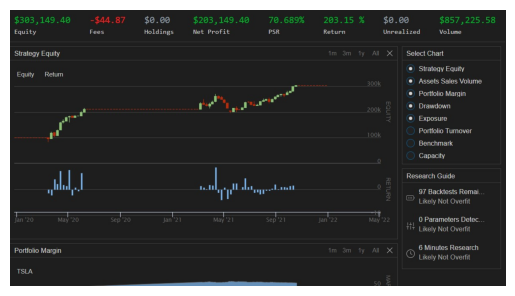

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "C:/Users/meets/QUANT/CODE/QUANTCONNECT/RSIBB.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()